# Model Development

**What is a model?** 
- Mathematical equation used to predict a value given one or more other values
- Relating one or more independent variables to dependent variables
- Usually, more data implies in more accuracy

In the examples of the course, we analyzed how the characteristics of the car are impacting in the car price

In [1]:
import pandas as pd
filename = filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filename, header=0)

## Linear Regression and Multiple Linear Regression

- Linear Regression: One independent variable to make a prediction
- Multiple Regression: Multiple independent variables to make a prediction

## Simple Linear Regression (SLR)

It's a method to understand the relationship between two variables

1. The predictor (independent) variable - $x$
2. The target (dependent) variable - $y$

$$
\boxed{y=b_{0} + b_{1} x}
$$

Where:
- $b_{0}$: the intercept
- $b_{1}$: the slope

## SLR: Prediction

We can create a model that predicts the price based on the highway mpg variables. The result is line where we can input a value (the highway mpg) and output the price

**How to determine the line?**

To do this, get some point of the data frame, and it is what we will use to train our model. The result is the parameters: ($b_0, b_1$)

To perform operations like this, we can represent the data as matrices

**Noise**: Add a small point on the line

Different reasons will impact on the car price, for example, make or how old the car car is

Since we don't have certain about it, we can use noise and add a random point and will change the data


**Fit and predict**

After fitting our model, we can predict the values

Predict
$$
\boxed{\hat{y}=b_0+b_1x}
$$

The model is not correct all the time! That's why it's important to **compare** the result to the actual value

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## Fitting a SLR in Python

Importing model and instanciating that

In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

/home/luis/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Getting the dependent and independent variables

In [4]:
X = df[['highway-mpg']]
y = df['price']

Fitting model and getting $\hat{y}$

In [5]:
lm.fit(X, y)

LinearRegression()

In [6]:
Yhat = lm.predict(X)

In [7]:
Yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

Note it's an array like!

View the intercept

In [8]:
lm.intercept_

38423.305858157386

View the slope

In [9]:
lm.coef_

array([-821.73337832])

The relationship between "price" and "highway-mpg" is given by:

$$
Price=38423.31 - 821.73 * highway-mpg
$$

## MLR

$$
\hat{Y} = b_0+b_1x_1+b_2x_2+b_3x_3+b_4x_4
$$

Where:
- $b_0$: intercept
- $b_1$: the **coefficient** or **parameter** of x_1
- $b_2$: the **coefficient** or **parameter** of x_2 and so on...

## Fitting a MLR in Python

In [10]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [11]:
Yhat = lm.predict(Z)

In [12]:
Yhat

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

In [13]:
lm.intercept_

-15806.624626329198

In [14]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Model Evaluation using Visualization

### Regression Plot

It give us a good estimate of:
1. The relationship between two variables
2. The strength of the correlation
3. The direction of the relationship (positive or negative)

Show us a combination of:
- Scatterplot and the fitted linear regression line ($\hat{y}$)

Plotting a regression plot in python $\downarrow$

(0.0, 48174.22099481381)

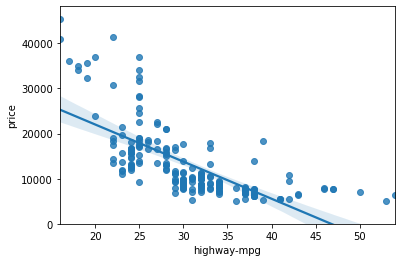

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

### Residual plot

Tell us the error between the actual value and the predicted value

what should we expect?
- The values should be randomly spread out around the x-axis
- If it's not randomly spread, it suggest the linear assumption is incorrect
- Nonlinear model may be more appropriate

Plotting residual plot in python $\downarrow$

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

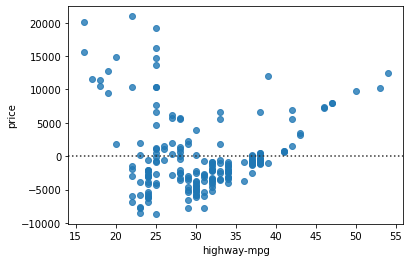

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.residplot(x='highway-mpg', y='price', data=df)

### Distribution plots

- Show the actual value and the predcited value at the same plot
- Great for visualization of models with more than one independent variable or feature

Plotting in python

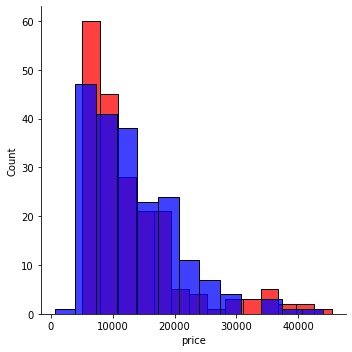

In [25]:
ax1 = sns.displot(x=df['price'], color='r', label="Actual Value")
sns.histplot(Yhat, color='b', label='Fitted Values', ax=ax1)

## Polynomial Regression and Pipelines

- A special case of the general linear regression model
- Useful for describing curvilinear relationships

**Curvlinear relationships**
By squaring or setting higher-order terms of the predictors variables

Examples
- Quadratic - $2^{nd}$ order: $\hat{Y} = b_{0} + b_{1}x_{1} + b_{2}(x_{1})^{2}$
- Cubic - $3^{nd}$ order: $\hat{Y} = b_{0} + b_{1}x_{1} + b_{2}(x_{1})^{2} + b_{3}(x_{1})^{3}$
- Higher order: $\hat{Y} = b_{0} + b_{1}x_{1} + b_{2}(x_{1})^{2} + b_{3}(x_{1})^{3}+\dots$

In [27]:
import numpy as np
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
p = np.poly1d(z)

In [28]:
print(p)

         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


### Polynomial Regression with more the one dimension

- Numpy can't deal with that
- Solution: Using scikit-learn

In [29]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)

In [30]:
x_polly = pr.fit_transform(df[['horsepower', 'curb-weight']])

In [31]:
x_polly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]])

### Pre-processing

- Data get larger, what should we do?
- Normalize data is the solution

In [32]:
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()

In [33]:
SCALE.fit(df[['horsepower', 'highway-mpg']])

StandardScaler()

In [34]:
x_scale = SCALE.transform(df[['horsepower', 'highway-mpg']])

In [35]:
x_scale

array([[ 0.20375448, -0.54228772],
       [ 0.20375448, -0.54228772],
       [ 1.3574159 , -0.689386  ],
       [-0.03770954, -0.10099285],
       [ 0.31107182, -1.27777915],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.9818052 , -1.57197573],
       [-0.06453888, -0.24809114],
       [-0.06453888, -0.24809114],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.83648429],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.57197573],
       [-1.48649365,  3.28226775],
       [-0.89624827,  1.81128488],
       [-0.89624827,  1.81128488],
       [-0.94990694,  1.51708831],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.41332024, -0.10099285],
       [ 1.11595188,

### Pipelines

- We have multiples steps when we perform machine learning algorithms
    - Transformations, standardizations and then predict
- A pipeline will help us to deal with this step

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

In [40]:
pipe = Pipeline(Input)

In [42]:
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [43]:
yhat = pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [45]:
yhat

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

## Measures for In-Sample Evaluation

- A way to numerically determine how good the model fits on dataset
- Determine the fit of a model:

### Mean Squared Error (MSE)

- In python, the MSE is available in the `metrics`

In [49]:
from sklearn.metrics import mean_squared_error

### R-Squared

- The coefficient of determination or R squared
- Is a measure to determine how close the data is to the fitted regression line
- R^2: the percentage of variation of the target variable (Y) that is explained by the linear model

$$
R^{2}=\Bigg(1-\dfrac{\text{MSE of regression line}}{\text{MSE of the average of the data}}\Bigg)
$$

- A good model will perform as: $R^{2} = 1$, since the fraction will be close to 0

- In python, we use the `score` method after the linear regression

```pytyon

X = df[['highway-mpg']]
Y = df['price']

lm.fit(X, Y)

lm.score(X, Y)

```

## Prediction and Decision Making 

- How do we determine if our model is correct?
- To determine final best fit, we look at a combination of:
    - Do the predicted values make sense
    - Visualization
    - Numerical measures for evaluation
    - Comparing models
    
See this example $\downarrow$

In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['highway-mpg']], df['price'])

LinearRegression()

Let's predict the price of a car with 30 highway-mpg

In [62]:
lm.predict([[30]])

array([13771.3045085])

The predition says the car cost will be \$ 13771.30

It make sense, the value is not negative, neither too much high neither low

In [63]:
import numpy as np
new_input = np.arange(1, 101, 1).reshape(-1, 1)

In [64]:
yhat = lm.predict(new_input)

In [66]:
yhat.shape

(100,)